# Welcome to the Minecraft Group Project!

## <ins>Introduction</ins> (459 words)
Due to COVID-19 and the strict lockdown policies imposed in many countries, a huge surge of gamers was observed in 2020, with the numbers racing up to 2.7 billion. Given this, many studies have been conducted on how gamers play video games and how video games can affect an individual’s well-being, cognitive performance and brain activity ([Johannes et al., 2021](https://doi.org/10.1098/rsos.202049); [Jordan & Dhamala, 2022](https://doi.org/10.1016/j.ynirp.2022.100112)).

Despite the global increase in the number of gamers and the potential advantages associated with video gaming, numerous studies have been hindered by limited sample sizes ([Alonso-Fernández et al., 2019](https://doi.org/10.1016/j.compedu.2019.103612); [Petri & Gresse, 2017](https://doi.org/10.1016/j.compedu.2017.01.004)) and inaccuracies stemming from reliance on self-reported engagement metrics ([Johannes et al., 2021](https://doi.org/10.1098/rsos.202049)). Addressing these critical issues, a team of computer scientists from the University of British Columbia, known as PLAICraft, has developed a study that automates data collection during players' gaming sessions in Minecraft. This approach alleviates concerns related to self-evaluation. Furthermore, PLAICraft aims to identify specific player types that are likely to generate a greater volume of data based on previous datasets, which will serve as the central focus of this paper. This study aims to investigate the age of players that is likely to yield a higher contribution rate, utilizing a K-nearest neighbours (K-NN) regression model based on both the players’ age and their total playtimes.

For this study, the PLAICraft team has provided two main datasets, [players.csv](https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz) and [sessions.csv](https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB). The `sessions.csv` dataset includes players’ hashed email, the [actual] start and end time in the format of date and 24-hour time, and the original start and end time of the sessions in UNIX format. Further, sessions.csv does not contain any anomalies. However, the dataset being used in this study is derived from `players.csv` because this is the only dataset that contains two variables related to the research questions, `Age` and `Total Playtimes`. This dataset contains a total of 196 observations and nine variables. These variables are listed and described in the table below:

<!DOCTYPE html>
<html>
<body>
    <table style="border-collapse: collapse; width: 40%; margin: auto auto; table-layout: auto; border: 0px solid black;">
        <caption style="font-size: 1.1em; font-weight: bold; margin-bottom: 5px; text-align: center;">
            Table 1: The Name of the Variables, Its Data Type and Meaning
        </caption>
        <tr>
            <th style="border: 0px solid black; text-align: center; padding: 10px;">Name</th>
            <th style="border: 0px solid black; text-align: center; padding: 10px;">Data Type</th>
            <th style="border: 0px solid black; text-align: center; padding: 10px;">Meaning</th>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Experience</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Self-evaluated experience with Minecraft</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Subscribe</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">lgl</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Declarations to receive email updates</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Hashed Email</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Encrypted email via Hash</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Played Hours</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">dbl</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Total played hours</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Name</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">A fake name used in-game</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Gender</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Gender of players</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Age</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">dbl</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Age of players</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Individual ID</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">The player's ID in-game</td>
        </tr>
        <tr style="border: 0px solid black;">
            <td style="border: 0px solid black; text-align: left; padding: 8px;">Organization Name</td>
            <td style="border: 0px solid black; text-align: center; padding: 8px;">chr</td>
            <td style="border: 0px solid black; text-align: left; padding: 8px;">The name of the players’ school/organization</td>
        </tr>
    </table>
</body>
</html>


It is important to note while the data can be used to provide meaningful insights into relevant topics, there are potential issues (anomalies) that exist in this data. This includes (1) missing values for `Individual ID` and `Organization Name` (e.g. reported as NA), (2) potential inaccuracy in the self-reported age (e.g. age 91 and 99) and (3) playtime might not correlate to contribution levels to the study (e.g microphone can also be used)

## <ins>Methods & Results</ins>
### Please delete below when done
*   **Methods & Results**:
    *   describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
    *   your report should include code which:
        *   loads data  
        *   wrangles and cleans the data to the format necessary for the planned analysis
        *   performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
        *   creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
        *   performs the data analysis
        *   creates a visualization of the analysis 
        *   _note: all figures should have a figure number and a legend_

In [1]:
# Loading in the different libraries
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### (1) Load the Data
After examining that the data is of comma-separated value files with the delimiter as a common (i.e. ","), we read in the data using the `read_csv()` as provided by `tidyverse` package using the URL given by the PLAICraft team. Do note that both files are being loaded in case that `sessions.csv` is needed for any potential use. Despite this, `players.csv` dataset is still the main focus of this study.

In [2]:
# Constants
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

# Reading in the data via URL
mc_players <- read_csv(url_players)
head(mc_players, 10)
mc_sessions <- read_csv(url_sessions)
head(mc_sessions, 10)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


### (3) Data Wrangling
Upon the initial examination, it is clear that in the `players.csv`, the columns/variables `individualID` and `organizationName` provide no information as all values are `NA` values. Similarly, the `experience`, `subscribe`, `hashedEmail` and `name` were also removed using the `select()` function as these variables have no values in the question of this paper (i.e. the research question does not look at these variables).

In [3]:
# Remove unnecessary columns
mc_cleaned <- mc_players |>
    select(played_hours, age, gender) |>
    arrange(age)
head(mc_cleaned, 5) # shorten for easier preview

played_hours,age,gender
<dbl>,<dbl>,<chr>
0.3,8,Male
30.3,9,Male
3.6,10,Male
2.9,11,Male
0.5,12,Male


### (4) Some Calculations (and Visualization)

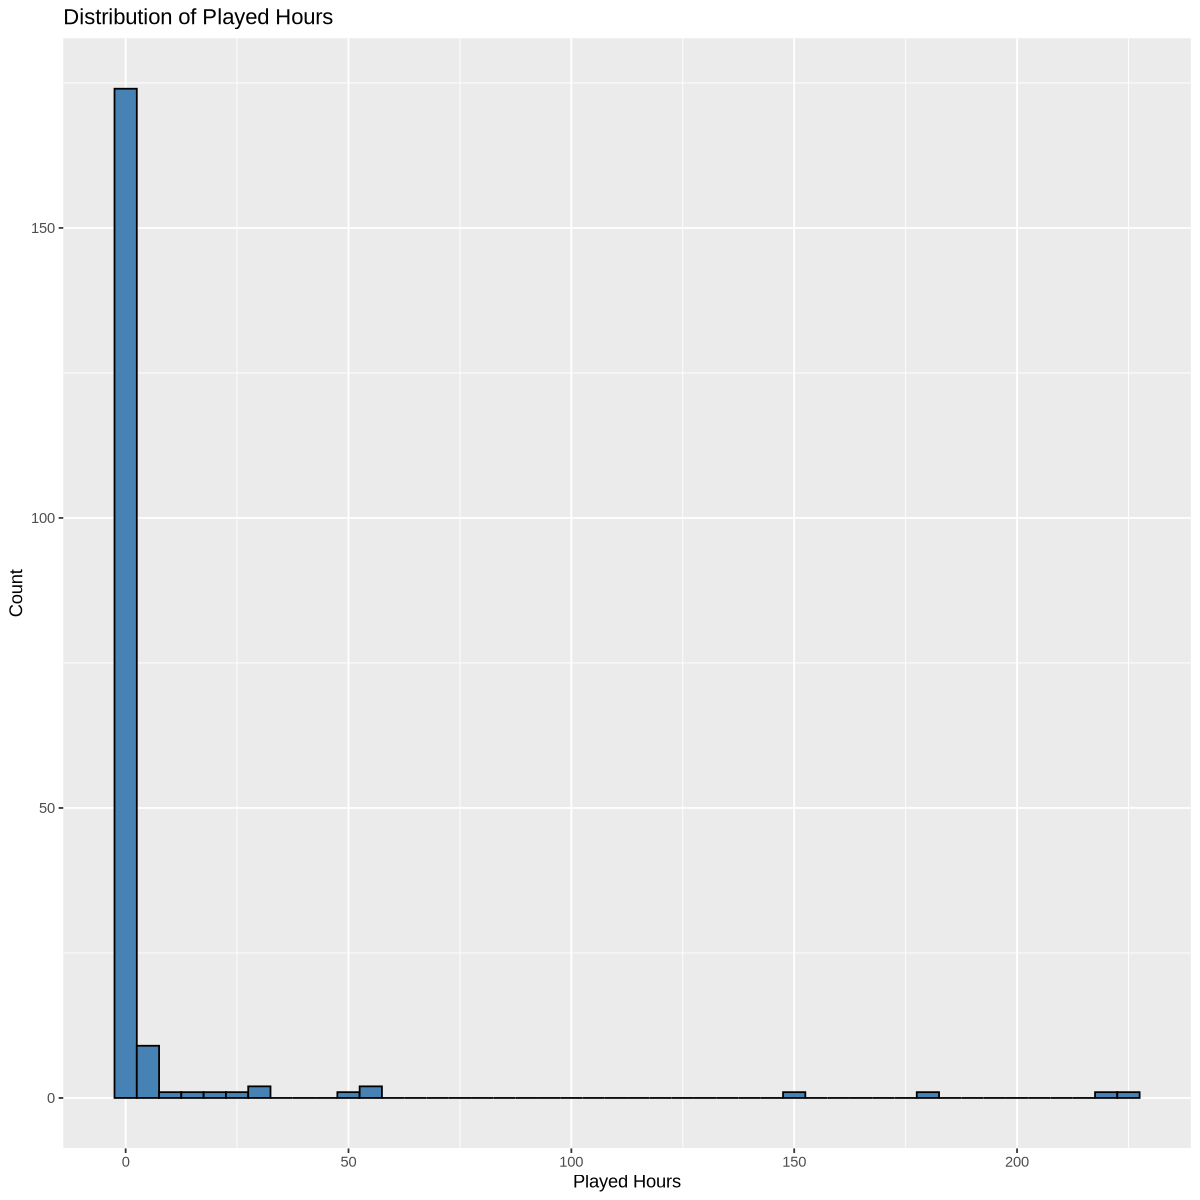

In [17]:
# distribution of total played hours among players
ggplot(mc_cleaned, aes(x = played_hours)) +
    geom_histogram(binwidth = 5, fill = "steelblue", color = "black") + 
    labs(title = "Distribution of Played Hours",
         x = "Played Hours", y = "Count")




The distribution is very skewed, the majority of players have very low playtime while a small number of players have playtimes exceeding 100 hours. 

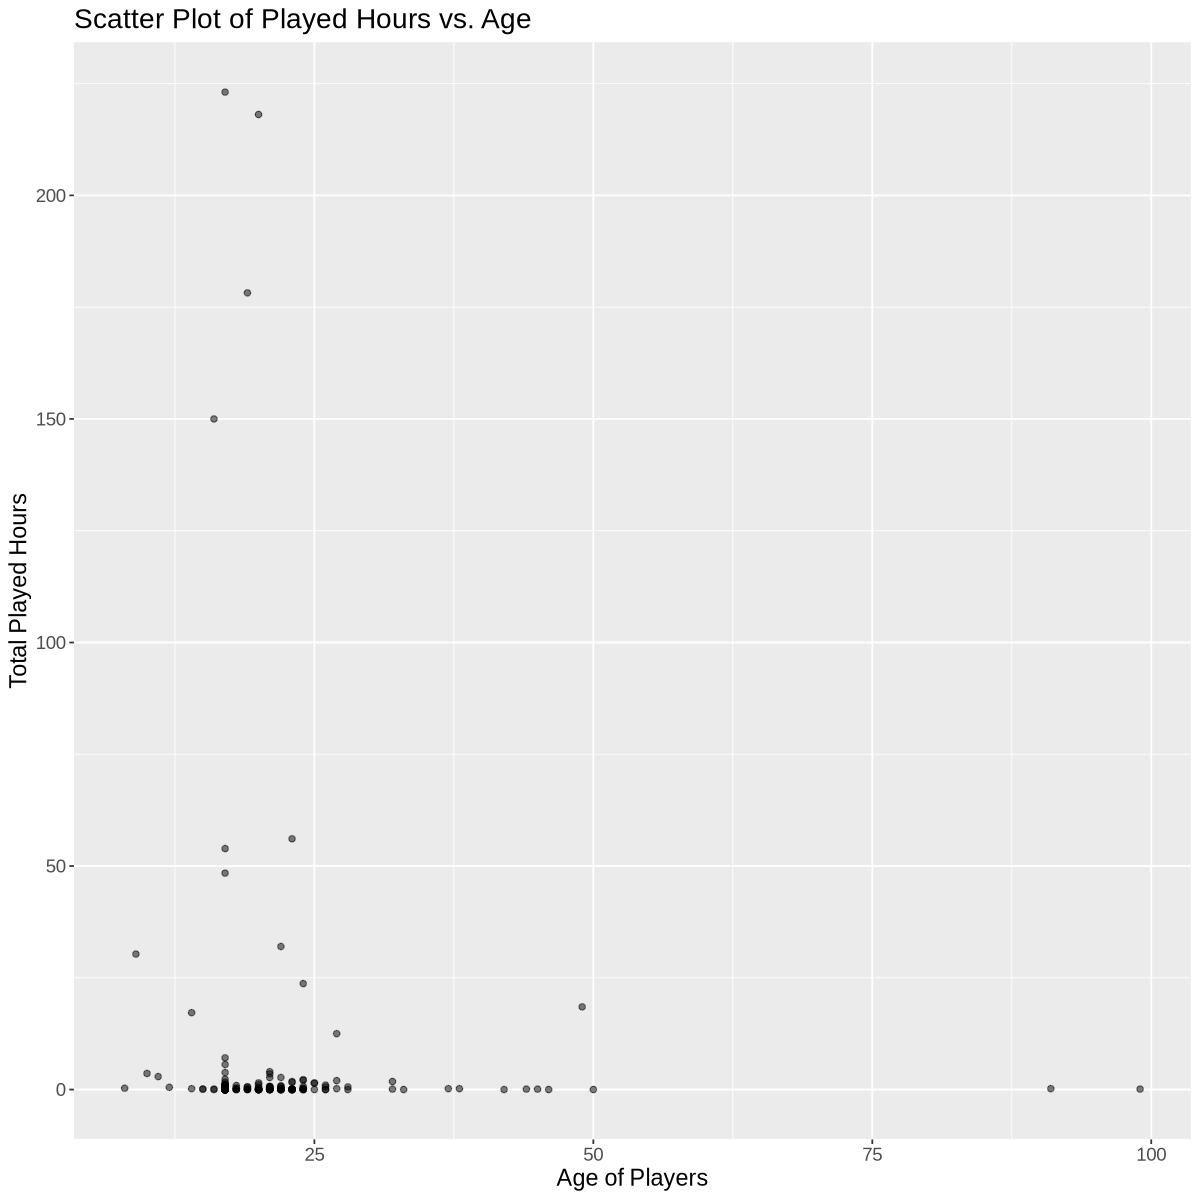

In [22]:
# scatter plot of played hours vs age
ggplot(mc_cleaned, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.5) +
    labs(title = "Scatter Plot of Played Hours vs. Age",
         x = "Age of Players",
         y = "Total Played Hours") +
    theme(text = element_text(size = 14))


There is no linear relationship between age and played hours. Based on this, we should try knn regression.

Here we implemented a KNN regression model to predict total `playtime` based on the player's `age` with a  **seed of 1**.

**Preprocessing**:
  - Split the dataset into training (75%) and testing (25%) subsets, stratified by `played_hours`.
  - Scaled and centered `age`.

**Tuning**:
  - Performed 10-fold cross-validation to tune the number of `neighbors` (1–100).
  - Selected the model with the lowest RMSE.

**Model Training and Prediction**:
  - Trained the final KNN model with the optimal number of neighbors.

**Visualization**:
  - Created a scatter plot of actual vs. predicted `played_hours` against `age` with a fitted line.


[1] 20

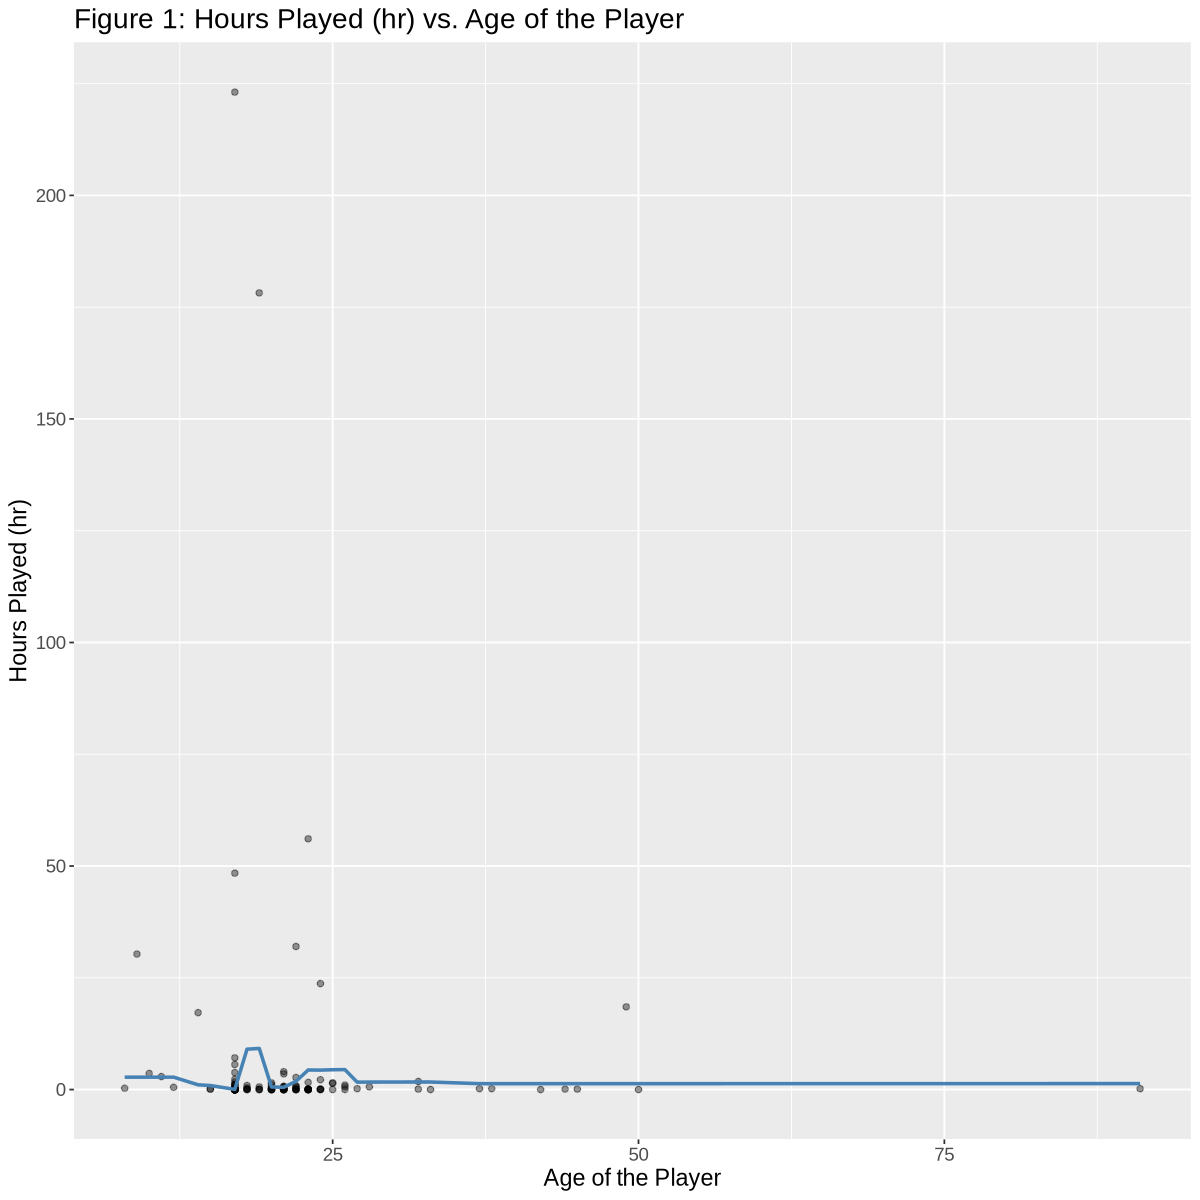

In [4]:
# Settings for the environment
options(repr.plot.width = 10, repr.plot.height = 10)
set.seed(1)

# Splitting the data into training set and testing set
mc_split <- initial_split(mc_cleaned, prop = 0.75, strata = played_hours)
mc_train <- training(mc_split)
mc_test <- testing(mc_split)

# Create the tuning model/engine specification with tune()
mc_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression") 

# Create the recipe that will be used
mc_recipe <- recipe(played_hours ~ age, data = mc_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Settings for the Cross-Validation of ten-fold
mc_vfold <- vfold_cv(mc_train, v = 10, strata = played_hours)

# The different number of neighbors (from 1 to 100) as a tibble
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1)) 

# Create the workflow to find the best K-value (low RMSPE)
mc_wkflw <- workflow() |>
    add_model(mc_spec) |>
    add_recipe(mc_recipe) 

# The metrics collected to find the K-value with the lowest RMSPE
mc_results <- mc_wkflw |>
  tune_grid(resamples = mc_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# Show only the row of minimum RMSPE and extracting the "neighbors" (K-value) value
mc_min <- mc_results |>
    slice_min(mean, n = 1) |>
    pull(neighbors)
mc_min

# Creating a new model/engine specification with the NEW K-value
mc_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = mc_min) |>
    set_engine("kknn") |>
    set_mode("regression") 

# Setting up the workflow with the new K-value
mc_fit <- workflow() |>
    add_recipe(mc_recipe) |>
    add_model(mc_spec_2) |>
    fit(data = mc_train) 

# Fitting the data
mc_preds <- mc_fit |>
  predict(mc_train) |>
  bind_cols(mc_train)
    
# Plotting the graph
mc_plot_final <- ggplot(mc_preds, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    geom_line(data = mc_preds,
              mapping = aes(x = age, y = .pred),
              color = "steelblue",
              linewidth = 1) +
    labs(x = "Age of the Player",
         y = "Hours Played (hr)",
        title = "Figure 1: Hours Played (hr) vs. Age of the Player") +
    theme(text = element_text(size = 14))
mc_plot_final

In [5]:
# Here we calculate the RMSE
RMSPE <- mc_fit |>
    predict(mc_test) |>
    bind_cols(mc_test) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()
RMSPE

[1] 38.25878

The average error between the predicted playtime and the actual playtime is approximately 38.26 hours. 

# To-Do

**Victor**
- [x] Re-do the introduction with the newer questions + describe the second data set
- [x] Clean up the comments + make graph looks better + add in comment for codes readability 

**Andy**
- [ ] Methods & Results: (the rest bullet of points)

**Jack**
- [ ] Methods & Results: Descriptions (first bullet point)
- [x] Added RMSPE calculation
- [x] Added more visualizations 

**Danny**
- [ ] Discussion

## References
- Alonso-Fernández, C., Calvo-Morata, A., Freire, M., Iván Martínez-Ortiz, & Baltasar Fernández-Manjón. (2019). Applications of data science to game learning analytics data: A systematic literature review. Computers & Education, 141, 103612. <https://doi.org/10.1016/j.compedu.2019.103612> 

- Johannes, N., Vuorre, M., & Przybylski, A. K. (2021). Video game play is positively correlated with well-being. Royal Society Open Science, 8(2), 202049. https://doi.org/10.1098/rsos.202049

- Jordan, T., & Dhamala, M. (2022). Video game players have improved decision-making abilities and enhanced brain activities. Neuroimage: Reports, 2(3), 100112. <https://doi.org/10.1016/j.ynirp.2022.100112> 

- Petri, G., & Gresse, C. (2017). How games for computing education are evaluated? A systematic literature review. Computers & Education, 107, 68--90. <https://doi.org/10.1016/j.compedu.2017.01.004>